Golden ratio and time complexity
======
The time it takes a program to terminate as a function of the input is sometimes exponential. This is often expressed as $O(c^n)$, where $c$ is some constant.

An example is the following code:

In [1]:
def powerset(n):
    '''Returns the a list of all subsets of {1,2,...,n} for a postive integer n'''
    if n==0:
        return [[]]
    subsets_without_n = powerset(n-1)
    subsets_with_n = [subset + [n] for subset in  subsets_without_n]
    return subsets_without_n + subsets_with_n

def test_powerset():
    assert powerset(0) == [[]]
    assert powerset(3) == [[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]
test_powerset()

Here the constant $c$ is $2$, as there are $2^n$ subsets of $\{1,2,...,n \}$. Recently, I encountered an interesting situation, where the constant happens to be the golden ratio.

Consider for a moment the following program (and disregard the fact that it could have solved the problem in a much better way)

In [2]:
def fibonnachi(n):
    '''
    Returns the n'th term in the fibonnachi sequence
    '''
    if n <= 2:
        return 1
    return fibonnachi(n-1) + fibonnachi(n-2)

Recall that the fibonacchi sequence $F_n$ is defined by:
$$ F_1 = 1, F_2 = 1 $$
and
$$ F_n = F_{n-1} + F_{n-2}  \ , n ≥ 2 $$

(for more info see https://oeis.org/A000045 )

The question now is "what is the time complexity of this function?"

We see that if $n$ is 1 or 2, then the result is returned immediately, and if $n$ is greater, then we have to wait for fibonacchi(n-1) and fibonacchi(n-2) to finish.

The time $T_n$ for the program to terminate thus satisfy the same identies as $F_n$ above. This roughly means that the time to compute the answer and hte answer itself is the same. Cool.

But where does the golden ration come from? It turns out that there exist a closed form for the fibanacchi sequence, first discovered by Daniel Bernoulli in 1728:
$$
F_n = \frac{1}{\sqrt{5}}(\phi^n-\Phi^n)
$$
where $\phi = \frac{1+\sqrt{5}}{2} = 1.6180339887...$ and $\Phi = \frac{1-\sqrt{5}}{2} = -0.6180339887...$.

Since the $|\Phi|$ < 1, we see that  $\lim_{n\to\infty}\Phi^n = 0$, so 
$$
F_n  \approx \frac{1}{\sqrt{5}}(\phi^n)
$$
But we can turn this approximation into an equality! Consider the following number $\frac{\Phi}{\sqrt{5}}$:

In [3]:
import math
Phi = -0.6180339887498949
Phi/math.sqrt(5)

-0.27639320225002106

Notice that $|\frac{\Phi}{\sqrt{5}}| < 0.5$. Since furthermore $|\frac{\Phi^n}{\sqrt{5}}| < 0.5$ for all $n$, we have the following identity:
$$ F_n = \left\lfloor \frac{\phi^n}{\sqrt{5}}=+\frac{1}{2} \right\rfloor = \text{round}\left(\frac{\phi^n}{\sqrt{5}}\right) $$

These identities show that $T_n$ is $O(\phi^n)$.

That is all well and good in theory, but does it also work in practice.

Let us a define a method which plots data on the actual time complexity and an exponential regression of the data. We will test it on the "powerset" method from earlier.

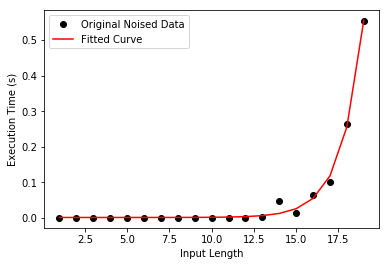

The regression curve is
2.0726432487205365e-07 * exp(0.7789252629055129 x) + 0.0012709958961720125
The regression extimates the constant c as 2.179129015748139


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def time_plot(method, start, end):
    method_time = []
    input_range = range(start,end)

    for n in input_range:
        start = time.perf_counter()
        method(n)
        end = time.perf_counter()
        timestamp = time.time() - start_time
        method_time.append(end - start)

    
    def func(x, a, b, c):
        return a * np.exp(b * x) + c

    popt, pcov = curve_fit(func, input_range, method_time)

    plt.figure().canvas.manager.set_window_title("Time Complexity")
    plt.plot(input_range, method_time, 'ko', label="Original Noised Data")
    plt.plot(input_range, func(input_range, *popt), 'r-', label="Fitted Curve")
    plt.xlabel("Input Length")
    plt.ylabel("Execution Time (s)")
    plt.legend()
    plt.show()

    a = popt[0]
    b = popt[1]
    c = popt[2]

    print("The regression curve is")
    print(f"{a} * exp({b} x) + {c}")
    base = math.exp(b)
    print(f"The regression extimates the constant c as {base}")

time_plot(powerset, 1, 20)

We see it the "powerset" example has an exponential behaviour. The base constant c in $O(c^n)$ is estimated to around 2, but the value fluctuates a bit each time the data is generated.

The base value is obtained as $e^{b}$ from the regression formula $T_x = a e^{b x} + {c}$ by using $ e^{b x}=\left( e^{b}\right)^x$.

Now for the moment of truth. What will happen when we try to find the base value,$c$ for our "fibonnachi" method?

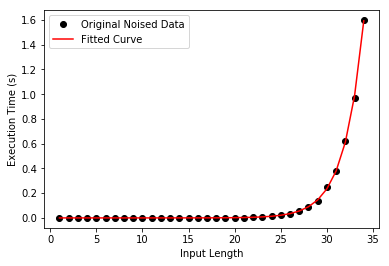

The regression curve is
1.3651692620976048e-07 * exp(0.47859837037103253 x) + -0.00017374246112787685
The regression extimates the constant c as 1.6138108511288576


In [173]:
time_plot(fibonnachi, 1, 35)

The value is thus estimated as 1.6176029818338031 (the value on your screen may be different, sice the code can be rerun). This gives an estimate which is correct on the first 2 decimals.

Attention should be drawn to the fact that is a terrible way of estimating the golden ratio. Indeed even the method "fibonnachi" is a very slow and therefore poor implementation.

Let us thus end with a good implementation of a function computing the fibonacchi numbers.

In [67]:
def fib_fast(n):
    ''' Returns the n'th term in the fibonnachi sequence '''
    if n <= 2:
        return 1
    prev, cur = 1, 1
    i = 2
    while i < n:
        prev, cur = cur, prev + cur
        i += 1
    return cur
    
def test_fib_fast():
    assert fib_fast(2) == 1
    assert fib_fast(3) == 2
    assert fib_fast(4) == 3
    assert fib_fast(5) == 5
    assert fib_fast(6) == 8

test_fib_fast()

Let us compare this implementation to the slow one from earlier.

The regression for the slow curve is
1.2227731687893812e-06 * exp(0.3632289063372369 x) + -9.470939864951051e-06
The regression for the fast curve is
7.709431087317102e-08 * x + 4.40948050389317e-07


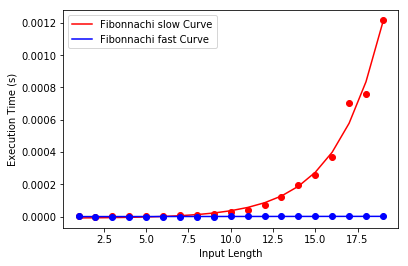

In [147]:
def exponential(x, a, b, c):
        return a * np.exp(b * x) + c

def linear(x,a,b):
    return a * x + b

def time_method(method, start, end):
    method_time = []
    input_range = range(start,end)

    for n in input_range:
        start = time.perf_counter()
        method(n)
        end = time.perf_counter()
        method_time.append(end - start)

    return method_time

def fit_and_plot(fit_func_assumption, input_range, method_time, method_name, colour,single_figure = True):
    popt, pcov = curve_fit(fit_func_assumption, input_range, method_time)
    if single_figure:
        plt.figure().canvas.manager.set_window_title("Time Complexity")
    plt.plot(input_range, method_time, f'{colour}o')
    plt.plot(input_range, fit_func_assumption(input_range, *popt), f'{colour}-', label=f"{method_name} Curve")
    plt.xlabel("Input Length")
    plt.ylabel("Execution Time (s)")
    plt.legend()
    if single_figure:
        plt.show()
    return popt

# Plotting the 2 Fibonacchi methods agains each other
plt.figure().canvas.manager.set_window_title("Time Complexity")
method_time = time_method(fibonnachi, 1, 20)
popt = fit_and_plot(exponential, range(1, 20), method_time,"Fibonnachi slow",'r', False)
a = popt[0]
b = popt[1]
c = popt[2]
print("The regression for the slow curve is")
print(f"{a} * exp({b} x) + {c}")
method_time = time_method(fib_fast, 1, 20)
popt = fit_and_plot(linear, range(1, 20), method_time,"Fibonnachi fast",'b', False)
a = popt[0]
b = popt[1]
print("The regression for the fast curve is")
print(f"{a} * x + {b}")
plt.show()

We can make an even faster method, by using the closed form of the fibonnachi sequence:

In [150]:
def fib_maybe_very_fast(n):
    '''Returns the n'th term in the fibonnachi sequence'''
    return round(1.6180339887 ** n /math.sqrt(5))
    
def test_fib_maybe_very_fast():
    assert fib_maybe_very_fast(2) == 1
    assert fib_maybe_very_fast(3) == 2
    assert fib_maybe_very_fast(4) == 3
    assert fib_maybe_very_fast(5) == 5
    assert fib_maybe_very_fast(6) == 8

test_fib_maybe_very_fast()

The regression for the very fast curve is
2.14308468601709e-10 * x + 1.220224595503382e-06
The regression for the fast curve is
1.218446062311882e-07 * x + 1.0571116448334428e-06


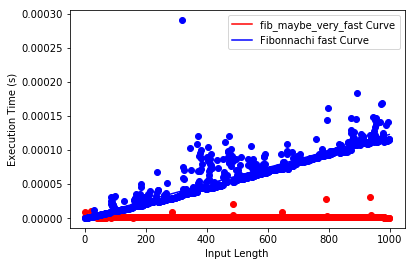

In [146]:
input_range = range(1,1000)

plt.figure().canvas.manager.set_window_title("Time Complexity")
method_time = time_method(fib_maybe_very_fast, input_range[0], input_range[-1]+1)
popt = fit_and_plot(linear, input_range, method_time,"fib_maybe_very_fast",'r', False)
a = popt[0]
b = popt[1]
print("The regression for the very fast curve is")
print(f"{a} * x + {b}")
method_time = time_method(fib_fast, input_range[0], input_range[-1]+1)
popt = fit_and_plot(linear, input_range, method_time,"Fibonnachi fast",'b', False)
a = popt[0]
b = popt[1]
print("The regression for the fast curve is")
print(f"{a} * x + {b}")
plt.show()

We see that it is indeed faster to use the closed form rather than sum a lot.

Below I try to see if the ratio between the actual compation time and the fib value is indeed constant. If this was the case (as it should be in theory), then one should be able to implement a very very slow method that computes the n'th fibonnachi number by first computing it using the slow method and then measuring the time it took and adjusting that time.

It seems to work a bit different in practice than it does on the purely theoretic algorithmic level and I was not able to find a perfect relationship between the computation time and the value of the fibonnachi number. Oh well...

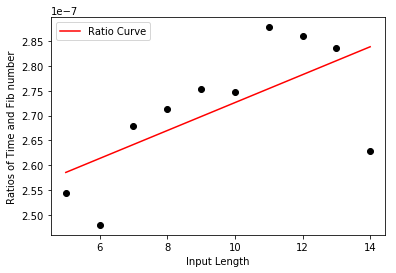

The regression for the ratio curve is
2.8163453251807272e-09 * x + 2.444448156474604e-07


In [195]:
input_range = range(5,15)
num_iterations = 100000

average_method_time = []
for n in input_range:
    start = time.perf_counter()
    for i in range(num_iterations):
        fibonnachi(n)
    end = time.perf_counter()
    average_method_time.append((end - start)/num_iterations)

time_to_output_ratios = [(average_method_time[i-input_range[0]])/fib_maybe_very_fast(i) for i in input_range]

popt, pcov = curve_fit(linear, input_range, time_to_output_ratios)
    
plt.figure().canvas.manager.set_window_title("Time Complexity")
plt.plot(input_range, time_to_output_ratios, f'ko')
plt.plot(input_range, linear(input_range, *popt), 'r-', label=f"Ratio Curve")
plt.xlabel("Input Length")
plt.ylabel("Ratios of Time and Fib number")
plt.legend()
plt.show()
a = popt[0]
b = popt[1]
print("The regression for the ratio curve is")
print(f"{a} * x + {b}")

Examples of regression lines with different ways of iterating.

-3.4914444034112626e-10 * x + 2.968440845792717e-07

6.6372040304205115e-09 * x + 2.079098234992264e-07

.910374018775641e-09 * x + 1.9283661090008395e-07

7.05452024647927e-09 * x + 1.918605670597993e-07

5.372013001210546e-09 * x + 2.072016519928606e-07

In [209]:
fib_approx = [time/2.7e-07 for time in average_method_time]
fib_appox_diff = [fib_approx[i]-fib_maybe_very_fast(i+5) for i in range(len(fib_approx))]

In [208]:
fib_appox_diff

[-0.2877142598110911,
 -0.653625665870667,
 -0.10177992621471255,
 0.10983366664084926,
 0.6680965923480002,
 0.9546608893907873,
 5.871105925887136,
 8.508011000463739,
 11.80197674172274,
 -9.959361221529207]

Thanks for reading